In [78]:
from tensorflow.keras.layers import *

In [79]:
inpt=Input(10,)
hidden1=Dense(1000,activation='relu')(inpt)
hidden2=Dense(500,activation='relu')(hidden1)

In [80]:
output1=Dense(1,activation='sigmoid')(hidden2)
output2=Dense(1)(hidden2)

In [81]:
from tensorflow.keras import Model

In [82]:
model=Model(inputs=[inpt],outputs=[output1,output2])

In [83]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 10)]                 0         []                            
                                                                                                  
 dense_19 (Dense)            (None, 1000)                 11000     ['input_6[0][0]']             
                                                                                                  
 dense_20 (Dense)            (None, 500)                  500500    ['dense_19[0][0]']            
                                                                                                  
 dense_21 (Dense)            (None, 1)                    501       ['dense_20[0][0]']            
                                                                                            

In [84]:
from keras.utils import plot_model

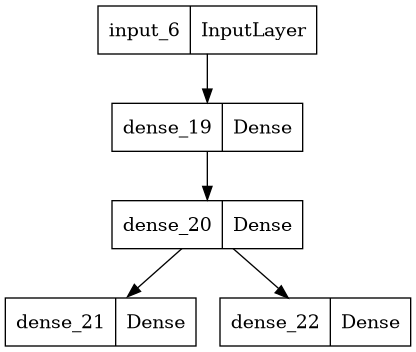

In [85]:
plot_model(model)

In [86]:
input1=Input(10,)
input2=Input(20,)

In [87]:
dense1=Dense(200,activation='relu')(input1)
dense2=Dense(100,activation='relu')(input1)

In [88]:
dense3=Dense(200,activation='relu')(input2)
dense4=Dense(100,activation='relu')(input2)

In [89]:
concat=concatenate([dense2,dense4])

In [90]:
dense5=Dense(10,activation='relu')(concat)
output=Dense(1,activation='sigmoid')(concat)

In [91]:
model2=Model(inputs=[input1,input2],outputs=[output])

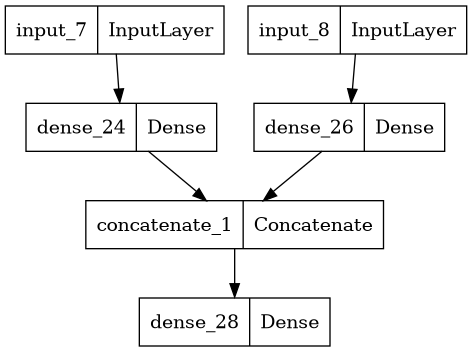

In [92]:
plot_model(model2)

In [93]:
import pandas as pd
data=pd.read_csv('/kaggle/input/age-gender-and-ethnicity-face-data-csv/age_gender.csv')
data

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


In [94]:
pixel_data = data['pixels'].apply(lambda x: np.fromstring(x, sep=' ', dtype=int))


In [95]:
demographic_data = data[['age', 'ethnicity', 'gender']]


In [96]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate, Flatten


In [97]:
pixel_data = pixel_data.apply(lambda x: x / 255.0)

# Convert the data to NumPy arrays
demographic_array = demographic_data.values
pixel_array = np.vstack(pixel_data)

# # Split the data into training and testing sets
# X_demo_train, X_demo_test, X_pixel_train, X_pixel_test, y_train, y_test = train_test_split(
#     demographic_array, pixel_array, data['target_column'], test_size=0.2, random_state=42
# )

In [98]:
X_train, X_test, y_train, y_test = train_test_split(
    pixel_array, demographic_array, test_size=0.2, random_state=42
)

In [99]:
data['age'].unique().sum()

5522

In [100]:
data['ethnicity'].value_counts()

ethnicity
0    10078
1     4526
3     3975
2     3434
4     1692
Name: count, dtype: int64

In [101]:
input_layer = Input(shape=(len(pixel_array[0]),))  # Assuming len(pixel_array[0]) is the number of pixels

# Shared layers for pixel data
x_shared = Dense(100, activation='relu')(input_layer)

# Branch for age prediction
x_age = Dense(1000, activation='relu')(x_shared)
x_age = Dense(1000, activation='relu')(x_shared)
output_age = Dense(1, name='age_output')(x_age)

# Branch for ethnicity prediction
x_ethnicity = Dense(500, activation='relu')(x_shared)
output_ethnicity = Dense(5, activation='softmax', name='ethnicity_output')(x_ethnicity)

# Branch for gender prediction
x_gender = Dense(500, activation='relu')(x_shared)
output_gender = Dense(1, activation='sigmoid', name='gender_output')(x_gender)


In [102]:
model = Model(inputs=input_layer, outputs=[output_age, output_ethnicity, output_gender])


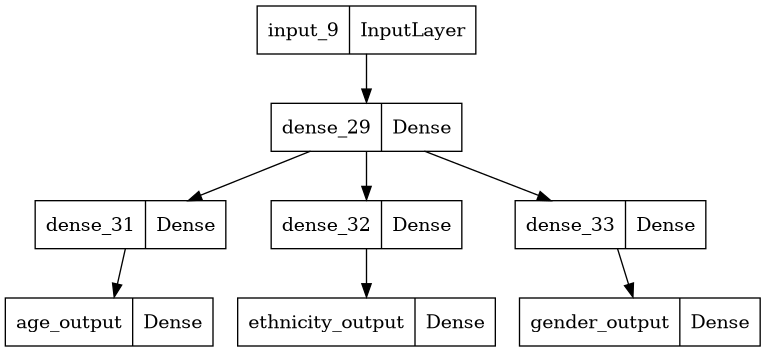

In [103]:
plot_model(model)

In [104]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 2304)]               0         []                            
                                                                                                  
 dense_29 (Dense)            (None, 100)                  230500    ['input_9[0][0]']             
                                                                                                  
 dense_31 (Dense)            (None, 1000)                 101000    ['dense_29[0][0]']            
                                                                                                  
 dense_32 (Dense)            (None, 500)                  50500     ['dense_29[0][0]']            
                                                                                            

In [105]:
model.compile(optimizer='adam',
              loss={'age_output': 'mean_squared_error', 'ethnicity_output': 'sparse_categorical_crossentropy', 'gender_output': 'binary_crossentropy'},
              metrics={'age_output': 'mae', 'ethnicity_output': 'accuracy', 'gender_output': 'accuracy'})

In [106]:
age_labels = y_train[:, 0]  # Extract age column
ethnicity_labels = y_train[:, 1]  # Extract ethnicity column
gender_labels = y_train[:, 2]  # Extract gender column


In [107]:
age_labels_test = y_test[:, 0]  # Extract age column
ethnicity_labels_test = y_test[:, 1]  # Extract ethnicity column
gender_labels_test = y_test[:, 2]

In [108]:
model.fit(X_train, {'age_output': age_labels, 'ethnicity_output': ethnicity_labels, 'gender_output': gender_labels},
          validation_data=(X_test, {'age_output': age_labels_test, 'ethnicity_output': ethnicity_labels_test, 'gender_output': gender_labels_test}),
          epochs=100, batch_size=32)


Epoch 1/100
593/593 [==============================] - 7s 9ms/step - loss: 375.2007 - age_output_loss: 373.1522 - ethnicity_output_loss: 1.4011 - gender_output_loss: 0.6476 - age_output_mae: 14.7261 - ethnicity_output_accuracy: 0.4371 - gender_output_accuracy: 0.6367 - val_loss: 251.8707 - val_age_output_loss: 250.0214 - val_ethnicity_output_loss: 1.2756 - val_gender_output_loss: 0.5738 - val_age_output_mae: 11.9603 - val_ethnicity_output_accuracy: 0.5026 - val_gender_output_accuracy: 0.7087
Epoch 2/100
593/593 [==============================] - 5s 8ms/step - loss: 267.7470 - age_output_loss: 265.8647 - ethnicity_output_loss: 1.3063 - gender_output_loss: 0.5761 - age_output_mae: 12.2877 - ethnicity_output_accuracy: 0.4790 - gender_output_accuracy: 0.6985 - val_loss: 266.0080 - val_age_output_loss: 264.1259 - val_ethnicity_output_loss: 1.2717 - val_gender_output_loss: 0.6104 - val_age_output_mae: 12.9985 - val_ethnicity_output_accuracy: 0.4972 - val_gender_output_accuracy: 0.6729
Epoch 

In [110]:
preds=model.predict(X_test)

149/149 [==============================] - 0s 3ms/step


In [116]:
age_preds=preds[0]

In [117]:
gender_preds=preds[1]

In [118]:
ethnicity_preds=preds[2]